In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [2]:
data=pd.read_csv("Hitters.csv")
df=data.copy()
df=df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
#Veri seti bazı basketbol oyuncularının bilgilerini vermiş.
#Verilen bilgileri kullanarak oyuncunun maaşını tahmin edeceğiz.
#Veriye genel olarak bir göz atıyoruz. Değişken tiplerini, kaç gözlem olduğunu görebiliriz.
#Veri setinde 321 gözlem varmış, eksik veri bulunan gözlemleri sildiğimiz için 263 e düşmüş.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [4]:
#Sürekli değişkenlere bir göz atalım.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [5]:
#Kategorik değişkenlere one-hot dönüşümü yapalım.
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [6]:
#Output'u ve kategorik değişkenleri veri setinden çıkartarak sadece sürekli değişkenleri bırakalım.
#Dönüşüm yaptığımız kategorik değişkenleri kukla değişkenlerden kurtararak veri setiyle birleştirelim.
y=df["Salary"]
x=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [7]:
#Veri setini train ve test kümesi olarak ayıralım.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()#n_components parametresini kullanarak istediğimiz değişken sayısı kadar bileşen oluşturabiliriz.
#Bir şey yazmadığımız için değişken sayısı kadar bileşen oluşacak.

In [9]:
x_reduced_train=pca.fit_transform(scale(x_train))#Scale ile veri setini indirgedik.
#Aralarında bağlantı problemi kalmamış, değişken sayısı kadar bileşen olan bir veri seti oldu.

In [10]:
x_reduced_train[0:1]#1. gözlemin değişkenleri.
#Veri setinde 19 tane değişken var. Her bir değişkeni ayrı ayrı scale etti.

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [11]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[:10]
#Kümülatif toplama fonksiyonunu kullanarak hangi değişkenlerin beraber veri setini ne kadar açıkladığına bakabiliriz.
#Mesela on değişken birlikte veri setinin %97.28'ini açıklayabiliyormuş.

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [12]:
#Bütün değişkenleri kullanarak oluşturduğumuz ve scale ettiğimiz veri seti ile regression modelini kuralım.
lm=LinearRegression()
pcr_model=lm.fit(x_reduced_train,y_train)

In [13]:
pcr_model.intercept_ #Kurduğumuz modelin sabiti

543.4834416243655

In [14]:
pcr_model.coef_ #Değişkenlerin kat sayıları

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [15]:
#Kurduğumuz model ile train setini  tahmin ettirelim.
y_pred=pcr_model.predict(x_reduced_train)
y_pred[:10]

array([ 377.44484744,  802.19452124,  495.60987745,  112.53177731,
        426.21613066, 1004.23596416,  154.72971833,  362.56259753,
        485.37668246,  918.71501904])

In [16]:
#Train seti için tahmin değerleri ile gerçek değerler arasındaki hata kareler ortalaması
print(np.sqrt(mean_squared_error(y_train,y_pred)))

289.3292825564977


In [17]:
#Modelin r2 skoru
r2_score(y_train,y_pred)

0.5770075250410178

In [18]:
y_train.head()

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
Name: Salary, dtype: float64

In [19]:
y_pred[:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [20]:
#Düzgün görselleştirme için array olan tahmini indexliyoruz.
df_ypred=pd.DataFrame(y_pred,index=y_train.index,columns=["Salary"])
df_ypred.head()

,Salary
183,377.444847
229,802.194521
286,495.609877
102,112.531777
153,426.216131


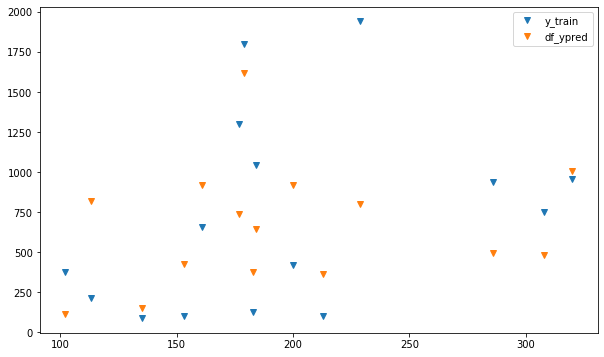

In [21]:
plt.figure(figsize=(10,6))
plt.plot(y_train.head(15),"v")
plt.plot(df_ypred.head(15),"v")
plt.legend(["y_train","df_ypred"]);
#Rahat görülmesi açısından train çıktılarını ve tahmin değerlerini grafikte gösterdim.
#Bazı değerleri yakın tahmin etmiş olsa da bazı değerlerde çok hata var.

In [22]:
#Test kümesi için de scale edelim
pca2=PCA()
x_reduced_test=pca2.fit_transform(scale(x_test))

In [23]:
#Daha iyi sonuç alabilmek için 10 katlı cross validation yapılandırması yapalım.
#n_splits parametresi kat sayısını belirliyor.
#Shuffle argümanı gruplara ayırma işlemini karıştırarak seçmesini sağlıyor.
cv_10=model_selection.KFold(n_splits=10,
                           shuffle=True,
                           random_state=1)

In [24]:
lm=LinearRegression()
RMSE=[]

In [25]:
#PCR'ın hiperparametresi değişken sayısıdır.
#Değişken sayısını değiştirerek çıkan hata sonuçlarını listeye atalım.
for i in np.arange(1,x_reduced_train.shape[1]+1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,
                                                     x_reduced_train[:,:i],
                                                     y_train.ravel(),
                                                     cv=cv_10,
                                                     scoring="neg_mean_squared_error").mean())
    RMSE.append(score)


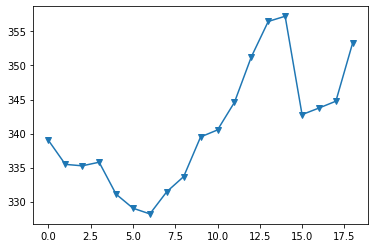

In [26]:
plt.plot(RMSE,"-v");
#Değişken sayılarına göre hata ortalamaları grafikte daha net gözüküyor. En az hata ortalaması 6 bileşenliymiş.

In [27]:
#En az hata ortalaması 6 bileşende çıktığı için optimum modeli kurarken 6 değişkene kadar seçiyoruz.
lm=LinearRegression()
pcr_model=lm.fit(x_reduced_train[:,:6],y_train)
y_pred=pcr_model.predict(x_reduced_test[:,:6])

In [28]:
df_ypred=pd.DataFrame(y_pred,index=x_test.index,columns=["Salary"])
df_ypred.head()

,Salary
148,751.813259
154,768.838924
318,1066.065419
279,431.008368
88,620.114400


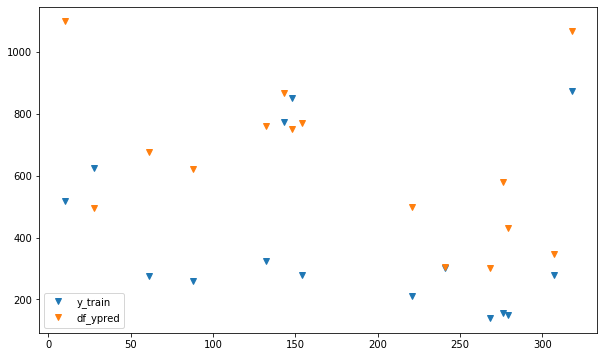

In [29]:
plt.figure(figsize=(10,6))
plt.plot(y_test.head(15),"v")
plt.plot(df_ypred.head(15),"v")
plt.legend(["y_train","df_ypred"]);